In [1]:
%pip install -U networkx

Requirement already up-to-date: networkx in d:\wpy64-3770\python-3.7.7.amd64\lib\site-packages (2.4)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\WPy64-3770\python-3.7.7.amd64\python.exe -m pip install --upgrade pip' command.


In [2]:
import networkx as nx

In [3]:
G_fb = nx.read_edgelist('data/facebook_combined.csv', create_using=nx.Graph(), nodetype=int)

# G_fb = nx.read_edgelist('data/facebook_combined.csv', create_using=nx.DiGraph(), nodetype=int)
 


In [4]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [5]:
nx.density(G_fb)

0.010819963503439287

In [ ]:
# No dirigido
nx.Graph()
# Grafo dirigido
nx.DiGraph()
# Grafo no dirigido con múltiples conexiones entre dos nodos
nx.MultiGraph()
# Grafo dirigido con múltiples conexiones entre dos nodos
nx.MultiDiGraph()



In [ ]:
# Centralidad de intermediación
bt = nx.betweenness_centrality(G_fb)

In [11]:
bt_list = [(id, b) for id, b in bt.items()]
bt_list_ord = sorted(bt_list, key=lambda b: b[1], reverse=True)

In [ ]:
bt

In [ ]:
# Centralidad de Kantz
# ka = nx.kantz_centrality(G_fb)
ka = nx.kantz_centrality_numpy(G_fb)
# nx.eigenvector_centrality(G_fb)
# nx.pagerank(G_fb)


In [13]:
spring_pos = nx.spring_layout(G_fb)

In [15]:
import matplotlib.pyplot as plt
plt.axis('off')
nx.draw_networkx(G_fb, pos=spring_pos, with_labels=False, node_size=2)

In [16]:
%pip install python-louvain

  Using cached python-louvain-0.14.tar.gz (19 kB)
  Created wheel for python-louvain: filename=python_louvain-0.14-py3-none-any.whl size=9294 sha256=340c4f77d719845b768d64d176374b85c3f2cb94c32e0bf355d3d86319daee1a
  Stored in directory: c:\users\javi\appdata\local\pip\cache\wheels\be\2d\1f\87004485ec41ab6f625f9320fd23d4755f2d7fe8cbc60d85dd
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\WPy64-3770\python-3.7.7.amd64\python.exe -m pip install --upgrade pip' command.


In [17]:
import community

In [18]:
parts = community.best_partition(G_fb)

In [22]:
communities = set(parts.values())

In [25]:
members = {c:[] for c in communities}
for id, c in parts.items():
    members[c].append(id)

In [27]:
for c, m in members.items():
    print(f'Comunidad {c}: {len(m)} elementos')

Comunidad 0: 350 elementos
Comunidad 1: 457 elementos
Comunidad 2: 446 elementos
Comunidad 3: 423 elementos
Comunidad 4: 535 elementos
Comunidad 5: 323 elementos
Comunidad 6: 117 elementos
Comunidad 7: 548 elementos
Comunidad 8: 73 elementos
Comunidad 9: 237 elementos
Comunidad 10: 60 elementos
Comunidad 11: 206 elementos
Comunidad 12: 226 elementos
Comunidad 13: 19 elementos
Comunidad 14: 19 elementos


In [28]:
colores = [parts[n] for n in G_fb.nodes()]

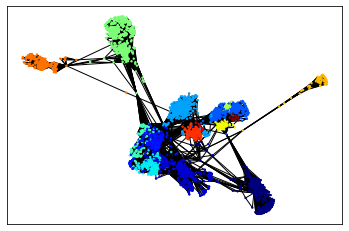

In [30]:
nx.draw_networkx(G_fb, pos=spring_pos, cmap=plt.get_cmap('jet'), node_color=colores, node_size=2, with_labels=False)